1. Data ETL

1.1 Data Loading

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
import math

In [2]:
plt.style.use('fast')
!pip install missingno
import missingno as msngno 
%matplotlib inline
import ast
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read train and test Data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.shape, df_test.shape

((1458644, 11), (625134, 9))

In [4]:
#print train data
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
#print test data
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [8]:
#check the NA in train data
df_train.isnull().any()
print(df_train.isnull().any())

id                    False
vendor_id             False
pickup_datetime       False
dropoff_datetime      False
passenger_count       False
pickup_longitude      False
pickup_latitude       False
dropoff_longitude     False
dropoff_latitude      False
store_and_fwd_flag    False
trip_duration         False
dtype: bool


In [9]:
#check the NA in test data
df_test.isnull().any()
print(df_test.isnull().any())

id                    False
vendor_id             False
pickup_datetime       False
passenger_count       False
pickup_longitude      False
pickup_latitude       False
dropoff_longitude     False
dropoff_latitude      False
store_and_fwd_flag    False
dtype: bool


In [10]:
#chaeck the information for train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [11]:
#check information for test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [12]:
#Train Data decribtion
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [13]:
#Test Data decribtion
df_test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


2. Knowledge Discovery

2.1 Calculate the distance by latitude and longitude

In [14]:
#calculated the distance by latitude and longitude
from scipy.spatial import distance
from scipy.spatial.distance import cdist
def haversine(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude):
    from math import radians, sin, cos, atan2, sqrt
    lat1, long1, lat2, long2 = map(radians, [pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude])
    a = sin((lat1-lat2)/2)**2 + cos(lat1)*cos(lat2)*(sin((long1-long2)/2)**2)
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return 6371 * c    #  r,km  #  


In [15]:
df_train['distance'] = df_train.apply(lambda row: 
                                
                                haversine(row['pickup_latitude'], 
                                          row['pickup_longitude'], 
                                          row['dropoff_latitude'], 
                                          row['dropoff_longitude']), axis=1)
df_test['distance']  = df_test.apply(lambda row: 
                               
                               haversine(row['pickup_latitude'], 
                                         row['pickup_longitude'], 
                                         row['dropoff_latitude'], 
                                         row['dropoff_longitude']), axis=1)

In [16]:
#print train data with distance
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188588
...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,1.225080
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.049836
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,7.824606
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1.092564


In [17]:
#print test data with distance
df_test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2.746426
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2.759239
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,1.306155
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,5.269088
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,0.960842
...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N,0.967438
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N,6.196343
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N,8.153719
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N,20.380748


2.2 Data Visualization

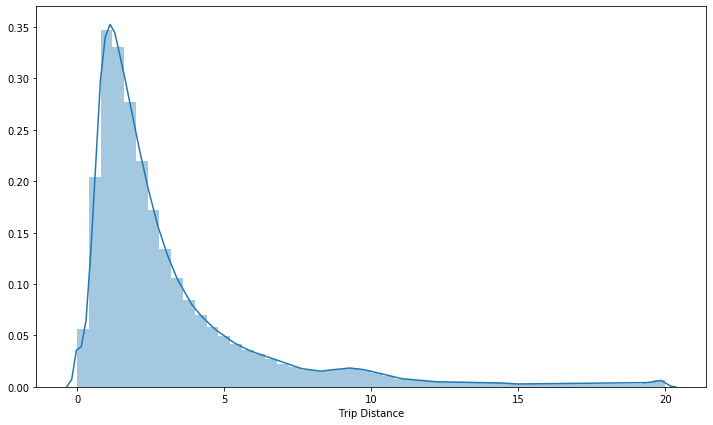

In [20]:
#Distribution distance and visualization
df_distance = df_train[df_train['distance'] <= 20].copy()
plt.figure(figsize=(12,7))
sns.distplot(df_distance['distance'].values, axlabel = 'Trip Distance', bins = 50)

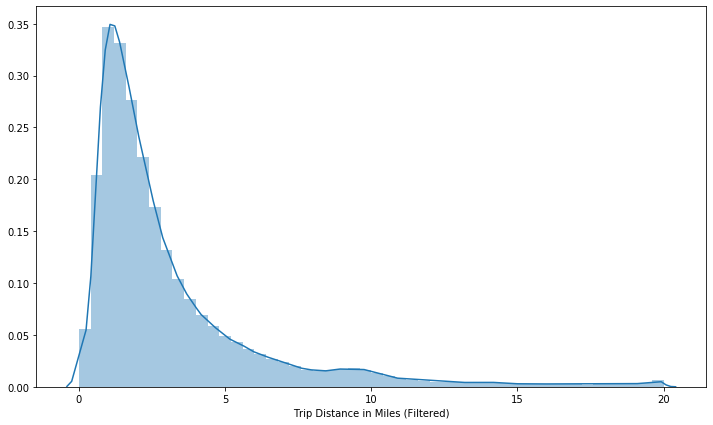

In [21]:
df_distance = df_test[df_test['distance'] <= 20].copy()
plt.figure(figsize=(12,7))
sns.distplot(df_distance['distance'].values, axlabel = 'Trip Distance in Miles (Filtered)', bins = 50)

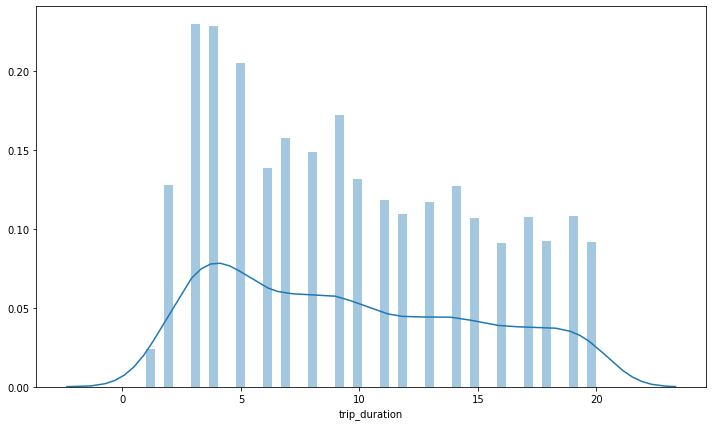

In [22]:
df_duration = df_train[df_train['trip_duration'] <=20].copy()
plt.figure(figsize=(12,7))
sns.distplot(df_duration['trip_duration'].values, axlabel = 'trip_duration', bins = 50)

In [18]:
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df_test['pickup_datetime'] = pd.to_datetime(df_test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

In [19]:
#Calculate and assign new columns to the dataframe such as weekday,
#month and pickup_hour which will help us to gain more insights from the data.
#data['weekday'] = data.pickup_datetime.dt.weekday_name
df_train['hour'] = df_train.loc[:,'pickup_datetime'].dt.hour;
df_train['week'] = df_train.loc[:,'pickup_datetime'].dt.week;
df_train['weekday'] = df_train.loc[:,'pickup_datetime'].dt.weekday;
df_train['hour'] = df_train.loc[:,'pickup_datetime'].dt.hour;
df_train['month'] = df_train.loc[:,'pickup_datetime'].dt.month;

df_test['hour'] = df_test.loc[:,'pickup_datetime'].dt.hour;
df_test['week'] = df_test.loc[:,'pickup_datetime'].dt.week;
df_test['weekday'] = df_test.loc[:,'pickup_datetime'].dt.weekday;
df_test['hour'] = df_test.loc[:,'pickup_datetime'].dt.hour;
df_test['month'] = df_test.loc[:,'pickup_datetime'].dt.month;

Text(0.5, 0, 'Trip Hour')

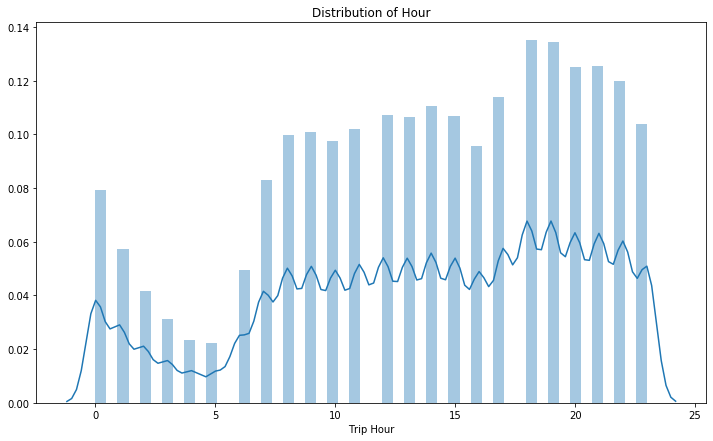

In [25]:
# analysis the train data hour feature by distribution plt
df_train['hour']
plt.figure(figsize=(12,7))
sns.distplot(df_train['hour']).set_title("Distribution of Hour")
plt.xlabel("Trip Hour")

Text(0.5, 0, 'Trip Hour')

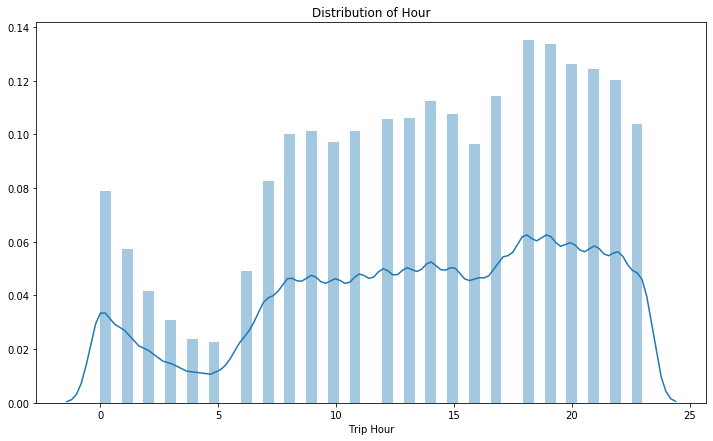

In [26]:
# analysis the test data hour feature by distribution plt
df_test['hour']
df_test['hour']
plt.figure(figsize=(12,7))
sns.distplot(df_test['hour']).set_title("Distribution of Hour")
plt.xlabel("Trip Hour")

In [20]:
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])
df_train['dropoff_datetime'] = pd.to_datetime(df_train['dropoff_datetime'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  distance            1458644 non-null  float64       
 12  hour                1458644 non-null  int64         
 13  week        

In [21]:
df_test['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])
df_test['dropoff_datetime'] = pd.to_datetime(df_train['dropoff_datetime'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  float64       
 5   pickup_latitude     625134 non-null  float64       
 6   dropoff_longitude   625134 non-null  float64       
 7   dropoff_latitude    625134 non-null  float64       
 8   store_and_fwd_flag  625134 non-null  object        
 9   distance            625134 non-null  float64       
 10  hour                625134 non-null  int64         
 11  week                625134 non-null  int64         
 12  weekday             625134 non-null  int64         
 13  month               625134 no

In [22]:
df_train['date'] = df_train['pickup_datetime'].dt.date
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,hour,week,weekday,month,date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498521,17,11,0,3,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805507,0,23,6,6,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385098,11,3,1,1,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485498,19,14,2,4,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188588,13,12,5,3,2016-03-26


In [23]:
df_test['date'] = df_test['pickup_datetime'].dt.date
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,hour,week,weekday,month,dropoff_datetime,date
0,id3004672,1,2016-03-14 17:24:55,1,-73.988129,40.732029,-73.990173,40.756680,N,2.746426,23,26,3,6,2016-03-14 17:32:30,2016-03-14
1,id3505355,1,2016-06-12 00:43:35,1,-73.964203,40.679993,-73.959808,40.655403,N,2.759239,23,26,3,6,2016-06-12 00:54:38,2016-06-12
2,id1217141,1,2016-01-19 11:35:24,1,-73.997437,40.737583,-73.986160,40.729523,N,1.306155,23,26,3,6,2016-01-19 12:10:48,2016-01-19
3,id2150126,2,2016-04-06 19:32:31,1,-73.956070,40.771900,-73.986427,40.730469,N,5.269088,23,26,3,6,2016-04-06 19:39:40,2016-04-06
4,id1598245,1,2016-03-26 13:30:55,1,-73.970215,40.761475,-73.961510,40.755890,N,0.960842,23,26,3,6,2016-03-26 13:38:10,2016-03-26


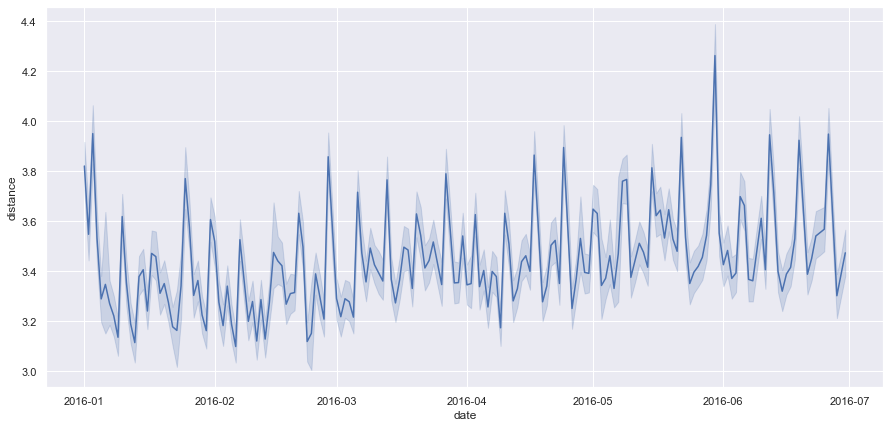

In [34]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.lineplot(x="date", y="distance", data=df_train)

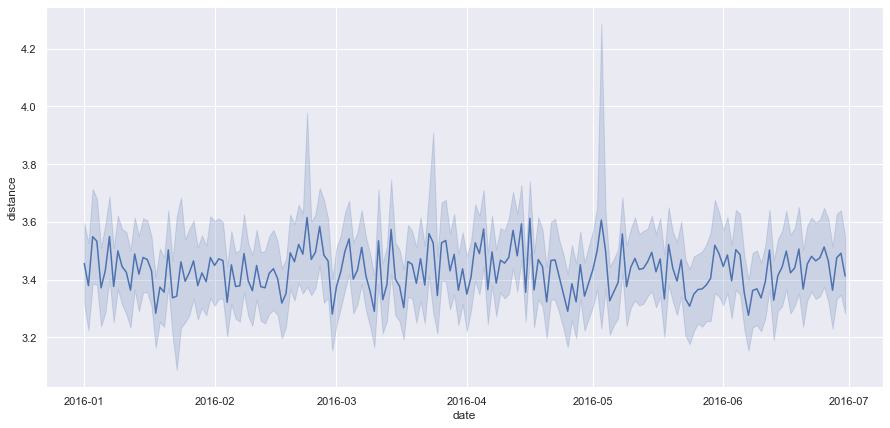

In [35]:
 sns.set(rc={'figure.figsize':(15, 7)})
sns.lineplot(x="date", y="distance", data=df_test)

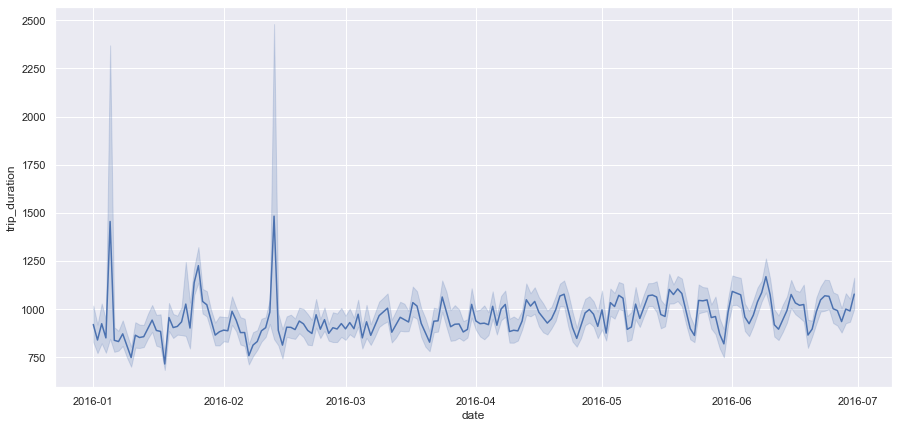

In [36]:
sns.lineplot(x="date", y="trip_duration", data=df_train)

3. Model Built and Prediction

3.1 Select features and gropby data to train data and test data

In [24]:
#Select 'trip_duration' and 'distance' as features
data_train= df_train[['trip_duration','distance']]

data_train

,trip_duration,distance
0,455,1.498521
1,663,1.805507
2,2124,6.385098
3,429,1.485498
4,435,1.188588
...,...,...
1458639,778,1.225080
1458640,655,6.049836
1458641,764,7.824606
1458642,373,1.092564


In [25]:
#groupby data to train data and test data in the train dataframe
df=data_train
train = df[:150]
test = df[150:180]
train

,trip_duration,distance
0,455,1.498521
1,663,1.805507
2,2124,6.385098
3,429,1.485498
4,435,1.188588
...,...,...
145,972,2.211689
146,318,1.136076
147,625,1.897957
148,859,2.304592


3.2 Built LinearRegresion Model and find best parameter to predict 

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error

X_train=train['distance'].values.reshape((-1,1))
y_train=train['trip_duration'].values.reshape((-1,1))
X_test=test['distance'].values.reshape((-1,1))
y_test=test['trip_duration'].values.reshape((-1,1))

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_y_predict = lr.predict(y_test)

# checking the rmsle，accuracy
lr_rmsle=np.sqrt(mean_squared_log_error(y_test,lr_y_predict))


print('LinearRegression RMSLE is ',lr_rmsle)

LinearRegression RMSLE is  4.616529350404572


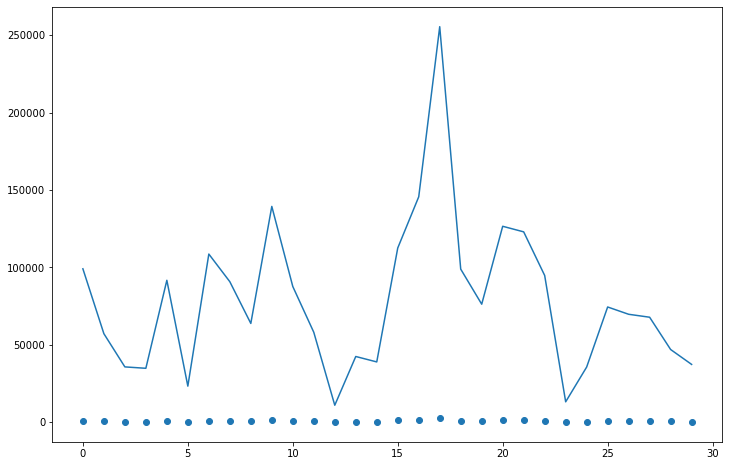

In [28]:
#Visualization the predict data
plt.figure(figsize=(12,8))

plt.scatter(np.arange(len(y_test)),y_test,label = 'true value')
plt.plot(np.arange(len(y_test)),lr_y_predict,label = 'predict value')
plt.show()